# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

#### Various references:
- https://medium.com/towards-data-science/gans-part2-dcgans-deep-convolution-gans-for-generating-images-c5d3c7c3510e
- http://guimperarnau.com/blog/2017/03/Fantastic-GANs-and-where-to-find-them
- https://github.com/soumith/ganhacks
- https://arxiv.org/pdf/1511.06434v2.pdf

In [1]:
from pdb import set_trace

In [2]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

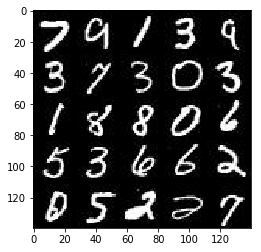

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

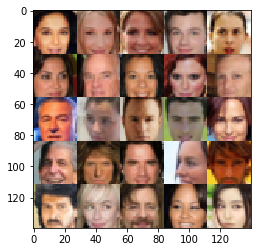

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
filters = [64, 128, 256]
filters_rev = filters[::-1]
alpha=0.01
drop_rate = 0.0  # no improvement detected with dropout

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Convolution shapes: https://www.tensorflow.org/api_guides/python/nn#Convolution
        # https://www.tensorflow.org/versions/master/tutorials/layers
        

        # Image inputs are 28x28x1 for bw, 28x28x3 for color
        conv1 = tf.layers.conv2d(inputs=images, filters=filters[0], kernel_size=[5,5], strides=[2,2], padding='same')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        drop1 = tf.layers.dropout(lrelu1, rate=drop_rate)

        # Inputs are 14x14x128
        conv2 = tf.layers.conv2d(inputs=drop1, filters=filters[1], kernel_size=[5,5], strides=[2,2], padding='same')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        # Inputs are 7x7x256
        conv3 = tf.layers.conv2d(inputs=lrelu2, filters=filters[2], kernel_size=[5,5], strides=[2,2], padding='same')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        drop3 = tf.layers.dropout(lrelu3, rate=drop_rate)
        
        # Inputs are 4x4x filter depth
        flattened = tf.reshape(drop3, (-1, 4*4*filters[2]))

        logits = tf.layers.dense(flattened, 1)
        sigmoid_output = tf.sigmoid(logits)

        return sigmoid_output, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
filters, filters_rev

([64, 128, 256], [256, 128, 64])

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=False if is_train==True else True):    

        # Create 4x4xfilters_rev[0]

        fully_connected = tf.layers.dense(z, 4*4*filters_rev[0])
        fully_connected = tf.reshape(fully_connected, (-1, 4, 4, filters_rev[0]))
        fully_connected = tf.layers.batch_normalization(fully_connected, training=is_train)
        fully_connected = tf.maximum(fully_connected, alpha*fully_connected)
        
        # Inputs are 4x4xfilters_rev[0]
        dconv2 = tf.layers.conv2d_transpose(inputs=fully_connected, 
                                            filters=filters_rev[1], 
                                            kernel_size=4, 
                                            strides=1, 
                                            padding='valid')
        batch_norm2 = tf.layers.batch_normalization(dconv2, training=is_train)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
#         set_trace()
        # Inputs are 7x7xfilters_rev[1]
        dconv3 = tf.layers.conv2d_transpose(inputs=lrelu2, 
                                            filters=filters_rev[2], 
                                            kernel_size=4, 
                                            strides=2, 
                                            padding='same')
        batch_norm3 = tf.layers.batch_normalization(dconv3, training=is_train)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        

        # Inputs are 14x14xfilters_rev[2]
        logits = tf.layers.conv2d_transpose(inputs=lrelu3, 
                                            filters=out_channel_dim, 
                                            kernel_size=4, 
                                            strides=2, 
                                            padding='same')   
        # Outputs are 28x28xout_channel_dim
        
        out = tf.tanh(logits)
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
#     set_trace()
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real, reuse=False)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    

    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real, 
                                                labels=tf.ones_like(disc_model_real)))    
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                                labels=tf.zeros_like(disc_model_fake)))
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                                labels=tf.ones_like(disc_model_fake)))

    disc_loss = disc_loss_real + disc_loss_fake

    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
import pytz
from datetime import datetime

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    # data_shape = celeba_dataset.shape = (202599, 28, 28, 3)
    image_width = data_shape[1]
    image_height = data_shape[2]
    out_channel_dim = data_shape[3]
    
    # Note: Cannot use the same name for the learning rate here due to conflict with the train learning_rate parameter.
    input_real, input_z, lr = model_inputs(image_width=image_width, 
                                                      image_height=image_height, 
                                                      image_channels=out_channel_dim, 
                                                      z_dim=z_dim)
    
    d_loss, g_loss = model_loss(input_real=input_real, input_z=input_z, out_channel_dim=out_channel_dim)
    d_opt, g_opt = model_opt(d_loss=d_loss, g_loss=g_loss, learning_rate=learning_rate, beta1=beta1)
    
    losses = []
    
    steps = 0
    print_every = 25
    show_every = 100
    
    print('Start time: {}'.format(datetime.now(pytz.timezone('America/Chicago'))))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
#                 batch_z = np.random.normal(0, 0.45, size=(batch_size, z_dim)) # no improvement with normal
                
                # Rescale real input images from [-.5, .5] to [-1, 1]
                batch_images = batch_images * 2

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                
                # Tried second optimization upon reviewer suggestion. Ref: https://github.com/carpedm20/DCGAN-tensorflow/blob/master/model.py#L266
                # However, for this model and hyperparameters, this inflates the discriminator loss.
#                 _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}, Step {}...".format(epoch_i+1, epochs, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess=sess, 
                                          n_images=show_n_images, 
                                          input_z=input_z, 
                                          out_channel_dim=out_channel_dim, 
                                          image_mode=data_image_mode)

    print('End time: {}'.format(datetime.now(pytz.timezone('America/Chicago')))) 
 

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Start time: 2017-07-26 10:47:43.589051-05:00
Epoch 1/2, Step 25... Discriminator Loss: 0.0278... Generator Loss: 4.2344
Epoch 1/2, Step 50... Discriminator Loss: 0.0255... Generator Loss: 4.4236
Epoch 1/2, Step 75... Discriminator Loss: 0.0287... Generator Loss: 4.2175
Epoch 1/2, Step 100... Discriminator Loss: 0.2963... Generator Loss: 10.6042


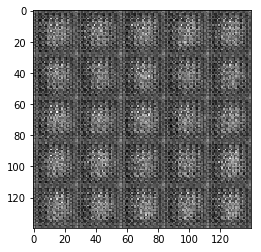

Epoch 1/2, Step 125... Discriminator Loss: 0.3865... Generator Loss: 1.8029
Epoch 1/2, Step 150... Discriminator Loss: 0.1137... Generator Loss: 3.1176
Epoch 1/2, Step 175... Discriminator Loss: 0.1165... Generator Loss: 3.1804
Epoch 1/2, Step 200... Discriminator Loss: 0.0248... Generator Loss: 4.6189


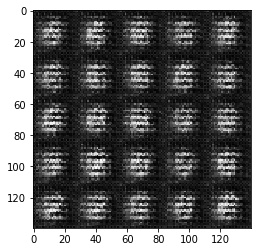

Epoch 1/2, Step 225... Discriminator Loss: 0.1150... Generator Loss: 3.2356
Epoch 1/2, Step 250... Discriminator Loss: 0.3152... Generator Loss: 3.4083
Epoch 1/2, Step 275... Discriminator Loss: 0.1644... Generator Loss: 2.7881
Epoch 1/2, Step 300... Discriminator Loss: 0.2612... Generator Loss: 2.2247


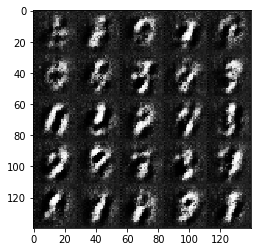

Epoch 1/2, Step 325... Discriminator Loss: 0.1901... Generator Loss: 3.1460
Epoch 1/2, Step 350... Discriminator Loss: 0.3456... Generator Loss: 2.4495
Epoch 1/2, Step 375... Discriminator Loss: 0.4990... Generator Loss: 1.3636
Epoch 1/2, Step 400... Discriminator Loss: 0.5678... Generator Loss: 1.2562


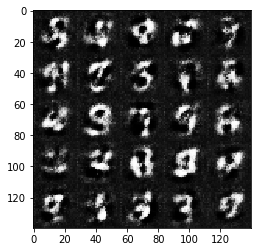

Epoch 1/2, Step 425... Discriminator Loss: 0.2703... Generator Loss: 2.0472
Epoch 1/2, Step 450... Discriminator Loss: 0.2222... Generator Loss: 2.5626
Epoch 2/2, Step 475... Discriminator Loss: 0.1720... Generator Loss: 3.0885
Epoch 2/2, Step 500... Discriminator Loss: 1.7631... Generator Loss: 6.6508


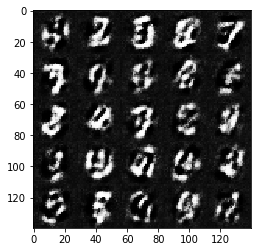

Epoch 2/2, Step 525... Discriminator Loss: 0.2510... Generator Loss: 2.0835
Epoch 2/2, Step 550... Discriminator Loss: 0.2115... Generator Loss: 2.8181
Epoch 2/2, Step 575... Discriminator Loss: 0.1985... Generator Loss: 2.8551
Epoch 2/2, Step 600... Discriminator Loss: 0.1813... Generator Loss: 2.5792


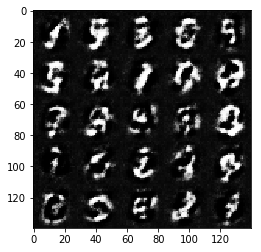

Epoch 2/2, Step 625... Discriminator Loss: 0.1809... Generator Loss: 2.8818
Epoch 2/2, Step 650... Discriminator Loss: 0.1648... Generator Loss: 3.1583
Epoch 2/2, Step 675... Discriminator Loss: 0.2011... Generator Loss: 3.8517
Epoch 2/2, Step 700... Discriminator Loss: 1.1510... Generator Loss: 0.5450


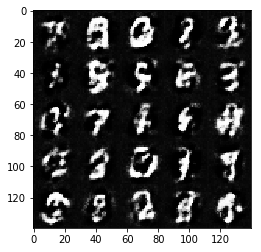

Epoch 2/2, Step 725... Discriminator Loss: 0.1527... Generator Loss: 3.2457
Epoch 2/2, Step 750... Discriminator Loss: 0.1485... Generator Loss: 3.0858
Epoch 2/2, Step 775... Discriminator Loss: 0.1627... Generator Loss: 2.5274
Epoch 2/2, Step 800... Discriminator Loss: 0.3897... Generator Loss: 5.0807


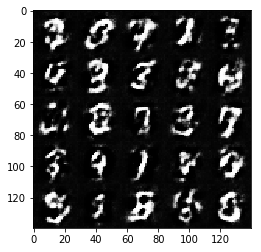

Epoch 2/2, Step 825... Discriminator Loss: 0.1655... Generator Loss: 2.5777
Epoch 2/2, Step 850... Discriminator Loss: 0.1805... Generator Loss: 2.3737
Epoch 2/2, Step 875... Discriminator Loss: 0.1750... Generator Loss: 2.7376
Epoch 2/2, Step 900... Discriminator Loss: 0.1333... Generator Loss: 2.9699


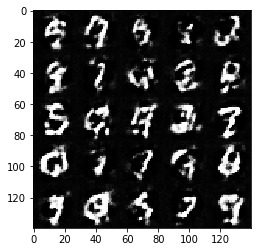

Epoch 2/2, Step 925... Discriminator Loss: 0.1637... Generator Loss: 3.1906
End time: 2017-07-26 11:16:14.828300-05:00


In [16]:
filters = [128, 256, 512]
filters_rev = filters[::-1]
alpha=0.2

batch_size = 128
z_dim = 100
learning_rate = 0.00005
beta1 = .5  # .5 tends to stabilize the losses from d and g across steps, per https://arxiv.org/pdf/1511.06434v2.pdf

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, 
    batch_size, 
    z_dim, 
    learning_rate, 
    beta1, 
    mnist_dataset.get_batches,
    mnist_dataset.shape, 
    mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Start time: 2017-07-26 11:36:10.793792-05:00
Epoch 1/1, Step 25... Discriminator Loss: 0.0647... Generator Loss: 3.3764
Epoch 1/1, Step 50... Discriminator Loss: 0.0354... Generator Loss: 4.0471
Epoch 1/1, Step 75... Discriminator Loss: 0.0513... Generator Loss: 3.4738
Epoch 1/1, Step 100... Discriminator Loss: 1.6612... Generator Loss: 22.9676


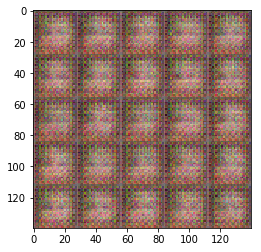

Epoch 1/1, Step 125... Discriminator Loss: 0.1838... Generator Loss: 4.1290
Epoch 1/1, Step 150... Discriminator Loss: 0.1267... Generator Loss: 3.0756
Epoch 1/1, Step 175... Discriminator Loss: 0.1398... Generator Loss: 3.3238
Epoch 1/1, Step 200... Discriminator Loss: 0.0510... Generator Loss: 3.8350


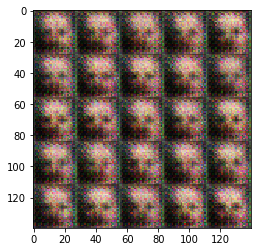

Epoch 1/1, Step 225... Discriminator Loss: 0.0275... Generator Loss: 4.6730
Epoch 1/1, Step 250... Discriminator Loss: 0.1079... Generator Loss: 3.1682
Epoch 1/1, Step 275... Discriminator Loss: 0.0243... Generator Loss: 4.4731
Epoch 1/1, Step 300... Discriminator Loss: 0.0405... Generator Loss: 4.3280


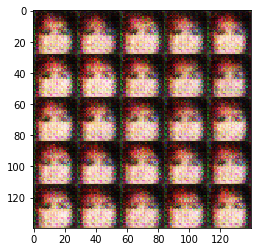

Epoch 1/1, Step 325... Discriminator Loss: 0.0364... Generator Loss: 4.0460
Epoch 1/1, Step 350... Discriminator Loss: 0.0577... Generator Loss: 3.9526
Epoch 1/1, Step 375... Discriminator Loss: 0.0221... Generator Loss: 4.6135
Epoch 1/1, Step 400... Discriminator Loss: 0.0743... Generator Loss: 3.5586


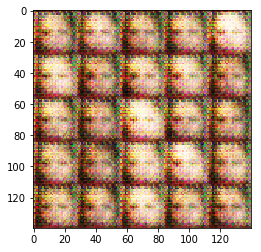

Epoch 1/1, Step 425... Discriminator Loss: 0.3810... Generator Loss: 1.6097
Epoch 1/1, Step 450... Discriminator Loss: 0.1450... Generator Loss: 3.7169
Epoch 1/1, Step 475... Discriminator Loss: 0.1006... Generator Loss: 3.6071
Epoch 1/1, Step 500... Discriminator Loss: 0.0810... Generator Loss: 3.4195


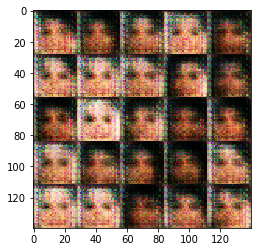

Epoch 1/1, Step 525... Discriminator Loss: 0.1374... Generator Loss: 3.2823
Epoch 1/1, Step 550... Discriminator Loss: 0.1822... Generator Loss: 6.7031
Epoch 1/1, Step 575... Discriminator Loss: 0.1174... Generator Loss: 3.2703
Epoch 1/1, Step 600... Discriminator Loss: 0.1985... Generator Loss: 4.0292


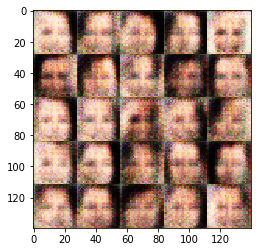

Epoch 1/1, Step 625... Discriminator Loss: 0.1406... Generator Loss: 3.6014
Epoch 1/1, Step 650... Discriminator Loss: 0.2087... Generator Loss: 4.5889
Epoch 1/1, Step 675... Discriminator Loss: 0.3186... Generator Loss: 5.5199
Epoch 1/1, Step 700... Discriminator Loss: 0.9167... Generator Loss: 6.4068


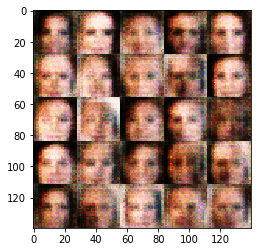

Epoch 1/1, Step 725... Discriminator Loss: 0.3590... Generator Loss: 1.8235
Epoch 1/1, Step 750... Discriminator Loss: 0.2826... Generator Loss: 2.1209
Epoch 1/1, Step 775... Discriminator Loss: 0.1937... Generator Loss: 2.6668
Epoch 1/1, Step 800... Discriminator Loss: 0.2775... Generator Loss: 2.5682


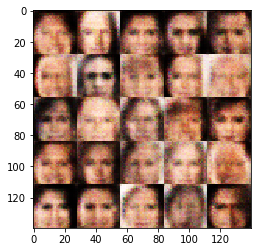

Epoch 1/1, Step 825... Discriminator Loss: 0.2375... Generator Loss: 3.2576
Epoch 1/1, Step 850... Discriminator Loss: 0.1273... Generator Loss: 3.8689
Epoch 1/1, Step 875... Discriminator Loss: 0.2800... Generator Loss: 2.2234
Epoch 1/1, Step 900... Discriminator Loss: 0.1810... Generator Loss: 3.1107


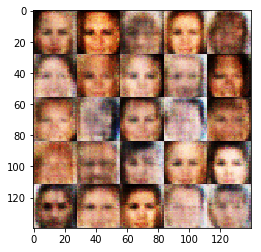

Epoch 1/1, Step 925... Discriminator Loss: 0.2962... Generator Loss: 2.0054
Epoch 1/1, Step 950... Discriminator Loss: 0.2184... Generator Loss: 2.8687
Epoch 1/1, Step 975... Discriminator Loss: 0.2190... Generator Loss: 3.3920
Epoch 1/1, Step 1000... Discriminator Loss: 0.2095... Generator Loss: 3.1636


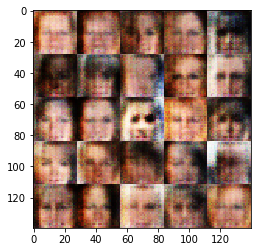

Epoch 1/1, Step 1025... Discriminator Loss: 0.2442... Generator Loss: 2.2891
Epoch 1/1, Step 1050... Discriminator Loss: 0.4392... Generator Loss: 4.4002
Epoch 1/1, Step 1075... Discriminator Loss: 0.3082... Generator Loss: 1.8963
Epoch 1/1, Step 1100... Discriminator Loss: 0.3475... Generator Loss: 2.9365


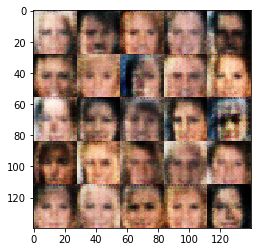

Epoch 1/1, Step 1125... Discriminator Loss: 0.3279... Generator Loss: 2.5196
Epoch 1/1, Step 1150... Discriminator Loss: 0.2690... Generator Loss: 2.2874
Epoch 1/1, Step 1175... Discriminator Loss: 1.2904... Generator Loss: 5.5008
Epoch 1/1, Step 1200... Discriminator Loss: 0.3605... Generator Loss: 2.2257


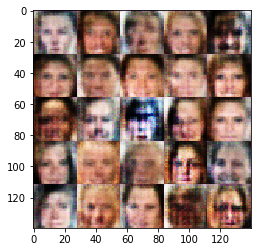

Epoch 1/1, Step 1225... Discriminator Loss: 0.2349... Generator Loss: 2.7390
Epoch 1/1, Step 1250... Discriminator Loss: 0.5870... Generator Loss: 3.3791
Epoch 1/1, Step 1275... Discriminator Loss: 0.7259... Generator Loss: 0.8797
Epoch 1/1, Step 1300... Discriminator Loss: 0.2757... Generator Loss: 2.8983


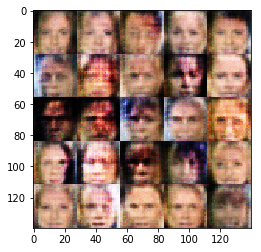

Epoch 1/1, Step 1325... Discriminator Loss: 0.7470... Generator Loss: 3.6838
Epoch 1/1, Step 1350... Discriminator Loss: 0.3662... Generator Loss: 2.6256
Epoch 1/1, Step 1375... Discriminator Loss: 0.3822... Generator Loss: 1.9669
Epoch 1/1, Step 1400... Discriminator Loss: 0.2907... Generator Loss: 2.4416


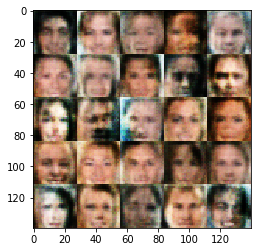

Epoch 1/1, Step 1425... Discriminator Loss: 0.3186... Generator Loss: 2.2674
Epoch 1/1, Step 1450... Discriminator Loss: 0.3240... Generator Loss: 2.1490
Epoch 1/1, Step 1475... Discriminator Loss: 0.4310... Generator Loss: 1.5497
Epoch 1/1, Step 1500... Discriminator Loss: 0.5220... Generator Loss: 1.3989


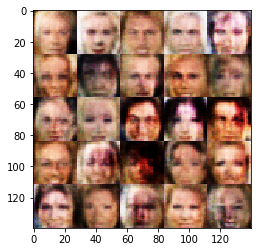

Epoch 1/1, Step 1525... Discriminator Loss: 0.3832... Generator Loss: 2.5325
Epoch 1/1, Step 1550... Discriminator Loss: 0.3555... Generator Loss: 2.0867
Epoch 1/1, Step 1575... Discriminator Loss: 0.4878... Generator Loss: 3.0037
End time: 2017-07-26 12:30:22.466585-05:00


In [17]:
filters = [128, 256, 512]
filters_rev = filters[::-1]
alpha=0.2

batch_size = 128
z_dim = 100
learning_rate = 0.00005
beta1 = .5  # Limited testing suggests images look marginally better using beta of .2 with just one epoch.

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.